[33 22 35 42 29 32 40 40 47 47 37 50 54 48 66 49 69 64 68 65 59 64 60 61
 67 66 60 62 60 58 91 61 62 80 65 75 71 49 51 45 42 42 42 29 21 18 16 10
  7 12  7  2  7  1  1  2  0  0  1  3]
18469.27256238881 -23.10595421852649 0.0013689925633507854
252.4092859994202 -351.88413947701986 1.557130895150101


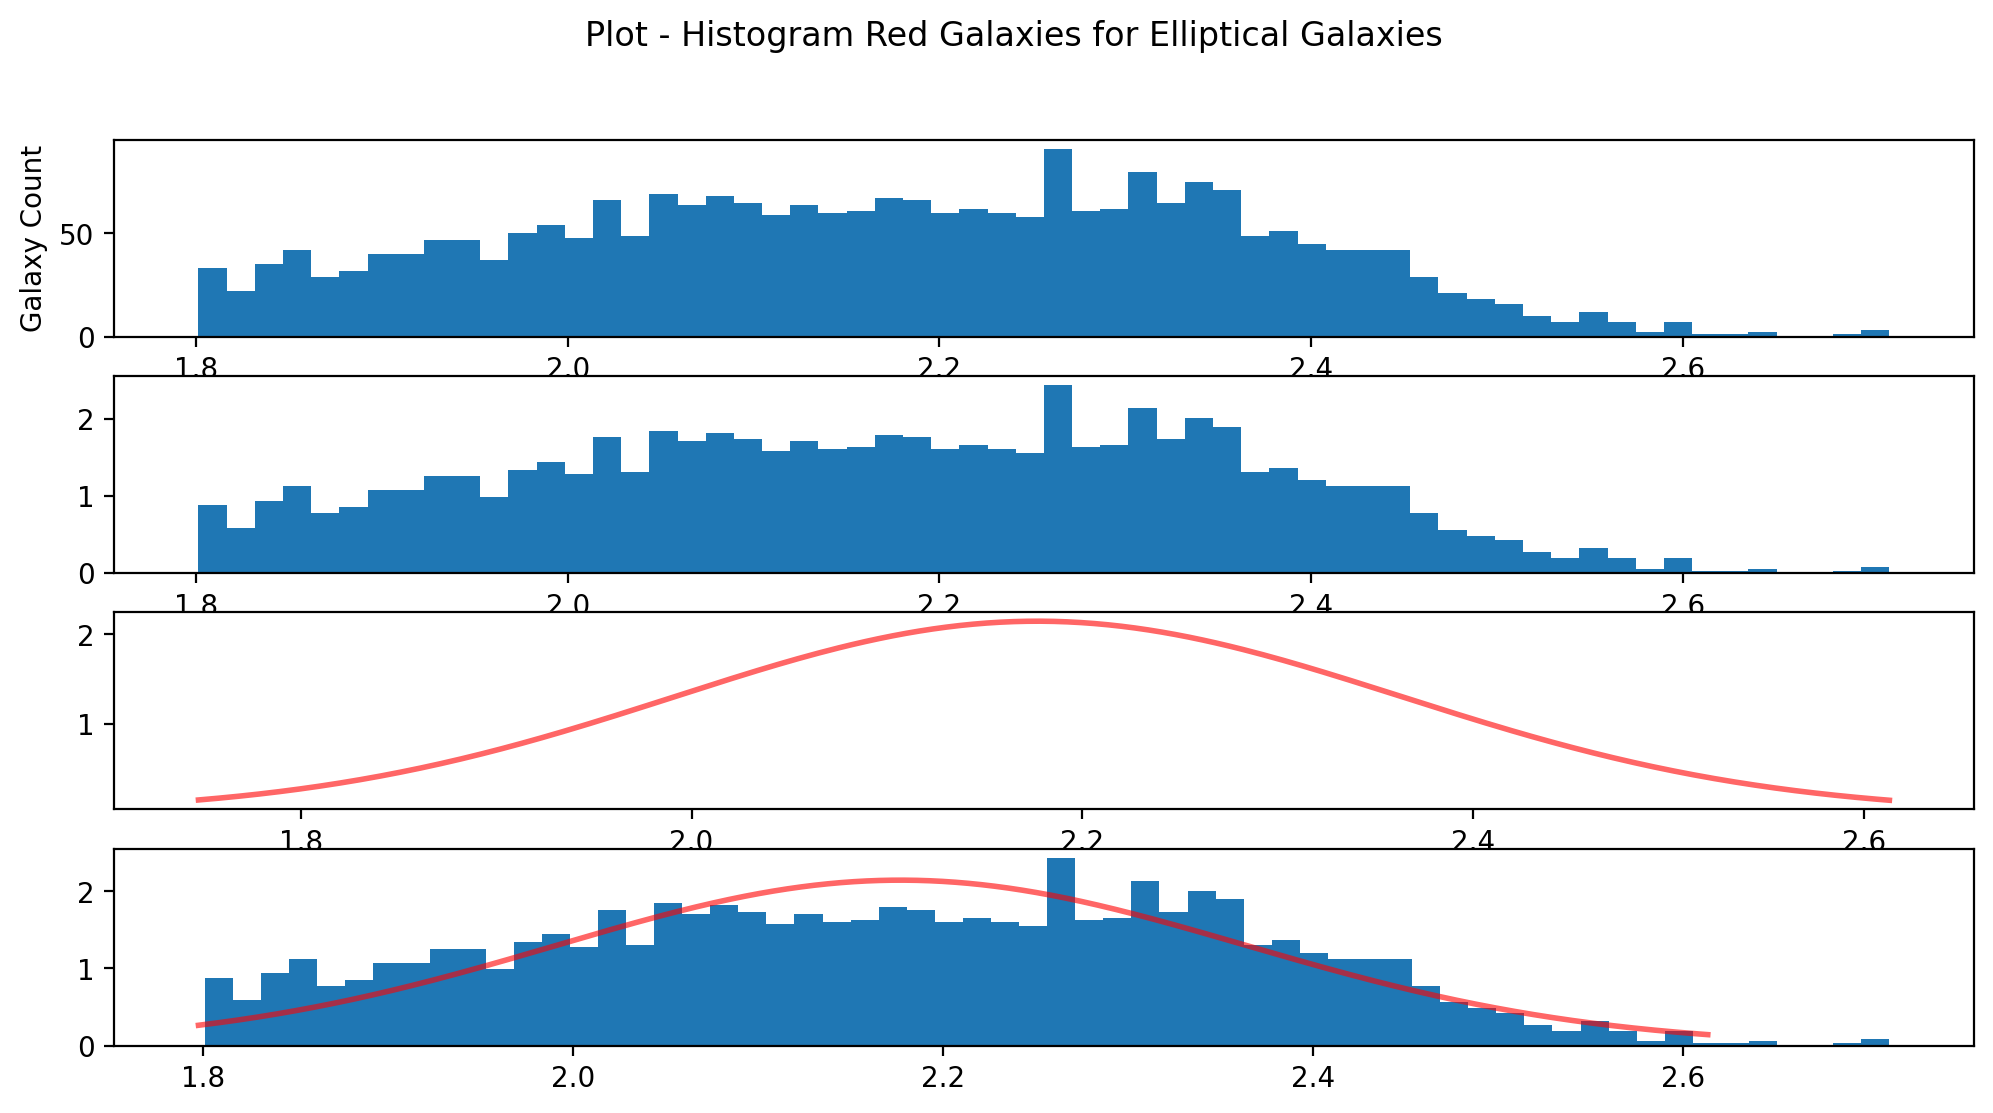

In [44]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

RawMassEClassEmeasure = Table.read('../../GAMA_Data/REMassEClassEmeasure.fits')
#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
#REMassEClassEmeasure = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange1 = RErange[RErange['SurfaceDensity']< 50]

binCount = 60
alphaVal = .3

##### uminusr
fig = plt.figure(figsize=(12, 6), dpi=200)
fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'
counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
print(counts)

ax1 = fig.add_subplot(4, 1, 1)
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
ax1.hist(bins[:-1],bins, weights=counts)

ax2 = fig.add_subplot(4, 1, 2)
ax2.hist(RErange1[xfield].data, bins=binCount, density=True)

ag2, bg2, cg2 =stats.gamma.fit(RErange1[xfield].data)
print(ag2, bg2, cg2)
ax3 = fig.add_subplot(4, 1, 3)
ag1, bg1, cg1 =stats.gamma.fit(counts)
print(ag1, bg1, cg1)
x0, x1 = stats.gamma.ppf([0.01, 0.99], ag2, loc = bg2, scale=cg2)
x = np.linspace(x0,x1, int(ag1))
#x = np.linspace(stats.gamma.ppf(x0,x1),100)
ax3.plot(x, stats.gamma.pdf(x, ag2, loc=bg2, scale = cg2),'r-', lw=2, alpha=0.6, label='gamma pdf')

ax4 = fig.add_subplot(4, 1, 4)

x0, x1 = stats.gamma.ppf([0.02, 0.99], ag2, loc = bg2, scale=cg2)
x = np.linspace(x0,x1, int(ag2))
#x = np.linspace(x0,x1, 100)
ax4.plot(x, stats.gamma.pdf(x, ag2, loc= bg2, scale = cg2),'r-', lw=2, alpha=0.6, label='gamma pdf')
ax4.hist(RErange1[xfield].data, bins=binCount, density=True)
plt.show()

